In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploration

In [5]:
nfl = pd.read_csv(r"C:\Users\Owen\Documents\Courses\DSCI 311\Project 2\players.csv") #Can take out subset with n_rows
nfl.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


Dimensionality:

In [7]:
nfl.shape

(1303, 7)

What are our variables?

In [9]:
list(nfl.columns)

['nflId',
 'height',
 'weight',
 'birthDate',
 'collegeName',
 'position',
 'displayName']

Any NAs?

In [11]:
nfl.isna().sum()

nflId          0
height         0
weight         0
birthDate      0
collegeName    0
position       0
displayName    0
dtype: int64

No NAs, but there may still be some values we don't want discovered down the line

In [13]:
nfl.describe()

,nflId,weight
count,1.303000e+03,1303.000000
mean,2.416518e+06,222.537222
std,5.333335e+05,29.476747
min,2.520000e+02,159.000000
25%,2.539662e+06,200.000000
50%,2.553658e+06,216.000000
75%,2.558184e+06,242.000000
max,2.561671e+06,352.000000


I'll want to make sure we know height is in inches and weight is in pounds. It looks like height isn't numerical. Let's check that.

Height is not an integer and dates cannot be manipulated yet like I might want them to be, check below:

In [16]:
nfl.dtypes

nflId           int64
height         object
weight          int64
birthDate      object
collegeName    object
position       object
displayName    object
dtype: object

Need to turn height into an integer value. Let's look at that column first

In [18]:
nfl['height'].value_counts()

height
73      159
72      153
74      141
75      136
71      127
76       90
70       81
77       67
6-2      42
69       37
78       37
6-0      33
5-10     32
6-1      29
5-11     27
6-4      25
6-3      25
68       18
6-5      11
5-9       9
79        9
67        3
80        3
66        2
6-6       2
6-7       2
5-6       1
5-8       1
5-7       1
Name: count, dtype: int64

Height is in inches, but it isn't standardized yet. It's in 2 forms, feet-inches, and inches. Right now it is a string, we want to standardize the form AND turn it into an integer.

In [20]:
nfl.head(10)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole
7,2507763,6-0,200,08/01/1986,Mississippi,WR,Mike Wallace
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz


This will require us to do some math on only a part of the height column. There might be an easier command to do this, but let's tackle this problem by breaking up the dataset, into heights we have to fix and those we just have to change into an integer.

In [22]:
nfl['height'] = nfl['height'].str.strip()
heights_unfinished = nfl['height'].str[1] == '-'#nfl['height'].str[0] if nfl['height'][1] = '-'
#nfl['height'].str.replace()
nfl['fix_height'] = heights_unfinished
nfl
#nfl[nfl['fix_height'] == True]

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,False
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False
...,...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East,True
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey,True
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False


In [23]:
nfl.sort_index(ascending=True)

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,False
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False
...,...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East,True
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey,True
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False


Now let's make a dataframe with only the heights we need to fix. We can parse by strings. We know no player is going to be double digit feet, so we can just use str(0) as the foot height. str(2:) will be the inches remaining.

In [25]:
height_to_fix = nfl[nfl['fix_height'] == True]

int_feet = np.array([int(foot) for foot in height_to_fix['height'].str[0]])
int_feet = int_feet * 12
int_inches = np.array([int(inches) for inches in height_to_fix['height'].str[2:]])
#int_inches
int_height = int_feet + int_inches
int_height

array([72, 72, 77, 72, 71, 69, 77, 71, 73, 70, 76, 71, 72, 70, 70, 76, 75,
       76, 76, 76, 74, 72, 73, 74, 77, 76, 76, 69, 69, 73, 74, 66, 74, 72,
       73, 71, 73, 77, 76, 74, 75, 77, 77, 73, 70, 73, 71, 75, 73, 73, 74,
       76, 72, 77, 74, 72, 69, 71, 71, 75, 72, 74, 68, 76, 71, 75, 73, 74,
       72, 75, 76, 72, 76, 75, 72, 76, 74, 70, 74, 75, 70, 71, 75, 71, 74,
       74, 75, 69, 76, 70, 71, 76, 71, 70, 70, 74, 72, 72, 75, 70, 72, 74,
       74, 71, 74, 71, 71, 76, 76, 75, 71, 74, 72, 72, 70, 72, 73, 76, 70,
       75, 76, 70, 72, 78, 77, 72, 70, 75, 69, 70, 70, 70, 77, 72, 74, 70,
       71, 72, 70, 72, 75, 79, 74, 72, 70, 70, 74, 73, 74, 71, 71, 75, 74,
       76, 74, 75, 76, 75, 74, 70, 72, 72, 73, 71, 77, 73, 75, 78, 70, 73,
       71, 73, 70, 70, 74, 72, 71, 73, 74, 71, 74, 76, 75, 73, 74, 76, 72,
       73, 73, 71, 70, 73, 73, 77, 71, 75, 72, 69, 74, 70, 69, 70, 73, 74,
       72, 73, 76, 73, 70, 74, 69, 74, 74, 75, 75, 75, 74, 72, 70, 74, 70,
       71, 72, 70, 73, 79

In [26]:
height_to_fix['height'] = int_height
height_to_fix

C:\Users\Owen\AppData\Local\Temp\ipykernel_26468\1097908426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_to_fix['height'] = int_height


,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height
7,2507763,72,200,08/01/1986,Mississippi,WR,Mike Wallace,True
10,2552582,72,223,06/15/1993,Boise State,RB,Jay Ajayi,True
21,2507828,77,268,02/26/1987,UCLA,TE,Logan Paulsen,True
38,2495613,72,196,07/25/1985,New Hampshire,FS,Corey Graham,True
43,2539291,71,185,02/07/1991,Oregon State,WR,Markus Wheaton,True
...,...,...,...,...,...,...,...,...
1293,2560716,74,237,10/13/1996,Western Michigan,TE,Donnie Ernsberger,True
1297,2543725,75,258,03/31/1992,Louisville,LB,Marcus Smith,True
1298,2553798,74,235,09/17/1991,Vanderbilt,LS,Andrew East,True
1299,2556814,74,200,05/17/1994,Duke,WR,Max McCaffrey,True


In [27]:
height_to_fix.dtypes

nflId           int64
height          int32
weight          int64
birthDate      object
collegeName    object
position       object
displayName    object
fix_height       bool
dtype: object

Now, we've fixed the heights and turned those into integers. We'll do the same with the heights that were already good/in standard form.

In [29]:
good_heights = nfl[nfl['fix_height'] == False]
good_heights['height'] = good_heights['height'].astype(int)#.dtypes
good_heights.dtypes
good_heights

C:\Users\Owen\AppData\Local\Temp\ipykernel_26468\1955510841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_heights['height'] = good_heights['height'].astype(int)#.dtypes


,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,False
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False
...,...,...,...,...,...,...,...,...
1294,2561359,72,180,1995-03-19,Texas Southern,WR,Darvin Kidsy,False
1295,2561394,71,205,1996-08-29,South Alabama,DB,Jeremy Reaves,False
1296,2541903,73,220,1990-04-18,Oklahoma,P,Tress Way,False
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False


Now put the two dataframes back together. The index should have remained the same throughout this process, so we just sort by it.

In [31]:
fixed_nfl = pd.concat([height_to_fix, good_heights])
fixed_nfl = fixed_nfl.sort_index(ascending=True)
#fixed_nfl = fixed_nfl.drop(columns = ['fix_height'], axis=0)
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,False
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False
...,...,...,...,...,...,...,...,...
1298,2553798,74,235,09/17/1991,Vanderbilt,LS,Andrew East,True
1299,2556814,74,200,05/17/1994,Duke,WR,Max McCaffrey,True
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False


We've concatenated our two dataframes with the fixed heights. Let's check to make sure it is the same as our original nfl dataset other than the data changes we've made!

In [33]:
nfl.shape == fixed_nfl.shape

True

In [34]:
nfl.tail(10)

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height
1293,2560716,6-2,237,10/13/1996,Western Michigan,TE,Donnie Ernsberger,True
1294,2561359,72,180,1995-03-19,Texas Southern,WR,Darvin Kidsy,False
1295,2561394,71,205,1996-08-29,South Alabama,DB,Jeremy Reaves,False
1296,2541903,73,220,1990-04-18,Oklahoma,P,Tress Way,False
1297,2543725,6-3,258,03/31/1992,Louisville,LB,Marcus Smith,True
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East,True
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey,True
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False
1302,2558095,6-2,196,10/12/1995,LSU,WR,Malachi Dupre,True


In [35]:
fixed_nfl.tail(10)

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height
1293,2560716,74,237,10/13/1996,Western Michigan,TE,Donnie Ernsberger,True
1294,2561359,72,180,1995-03-19,Texas Southern,WR,Darvin Kidsy,False
1295,2561394,71,205,1996-08-29,South Alabama,DB,Jeremy Reaves,False
1296,2541903,73,220,1990-04-18,Oklahoma,P,Tress Way,False
1297,2543725,75,258,03/31/1992,Louisville,LB,Marcus Smith,True
1298,2553798,74,235,09/17/1991,Vanderbilt,LS,Andrew East,True
1299,2556814,74,200,05/17/1994,Duke,WR,Max McCaffrey,True
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False
1302,2558095,74,196,10/12/1995,LSU,WR,Malachi Dupre,True


Everything looks the same, now we can see height is an integer, which means we can describe it.

In [37]:
fixed_nfl.dtypes

nflId           int64
height          int32
weight          int64
birthDate      object
collegeName    object
position       object
displayName    object
fix_height       bool
dtype: object

In [38]:
fixed_nfl.describe()

,nflId,height,weight
count,1.303000e+03,1303.000000,1303.000000
mean,2.416518e+06,73.220261,222.537222
std,5.333335e+05,2.461030,29.476747
min,2.520000e+02,66.000000,159.000000
25%,2.539662e+06,71.000000,200.000000
50%,2.553658e+06,73.000000,216.000000
75%,2.558184e+06,75.000000,242.000000
max,2.561671e+06,80.000000,352.000000


In [39]:
fixed_nfl.dtypes

nflId           int64
height          int32
weight          int64
birthDate      object
collegeName    object
position       object
displayName    object
fix_height       bool
dtype: object

Let's fix birthdate to be a datetime object so that we can do the same with that.    

In [41]:
fixed_nfl['birthDate'].value_counts()

birthDate
1989-04-26    4
06/16/1988    3
1993-04-10    3
1990-09-08    3
1995-03-21    3
             ..
1993-12-10    1
1988-01-30    1
1983-12-02    1
1992-12-24    1
10/12/1995    1
Name: count, Length: 1150, dtype: int64

Use pd.to_datetime, since there are multiple formats present, we can just adjust the format argument.

In [43]:
fixed_bdates = pd.to_datetime(fixed_nfl['birthDate'], format='mixed')

In [44]:
fixed_nfl['birthDate'] = fixed_bdates
fixed_nfl.dtypes

nflId                   int64
height                  int32
weight                  int64
birthDate      datetime64[ns]
collegeName            object
position               object
displayName            object
fix_height               bool
dtype: object

Now it's a datetime and we can describe it as well.

In [46]:
fixed_nfl.describe()

,nflId,height,weight,birthDate
count,1.303000e+03,1303.000000,1303.000000,1303
mean,2.416518e+06,73.220261,222.537222,1992-05-27 09:15:53.184957824
min,2.520000e+02,66.000000,159.000000,1977-08-03 00:00:00
25%,2.539662e+06,71.000000,200.000000,1990-07-05 00:00:00
50%,2.553658e+06,73.000000,216.000000,1993-01-14 00:00:00
75%,2.558184e+06,75.000000,242.000000,1994-11-03 00:00:00
max,2.561671e+06,80.000000,352.000000,1998-05-02 00:00:00
std,5.333335e+05,2.461030,29.476747,NaN


Everything looks good there. Let's see our birthdate range:

In [48]:
[np.min(fixed_nfl["birthDate"]), np.max(fixed_nfl["birthDate"])]

[Timestamp('1977-08-03 00:00:00'), Timestamp('1998-05-02 00:00:00')]

That means we have players who are over 20 years apart in age playing at the same time. That's pretty wild!

In [50]:
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,False
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False
...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,True
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,True
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False


In [51]:
nfl_numeric = fixed_nfl[np.array(fixed_nfl.columns[1:4])]
#nfl_numeric
nfl_numeric.corr()

,height,weight,birthDate
height,1.000000,0.661144,-0.088815
weight,0.661144,1.000000,-0.114966
birthDate,-0.088815,-0.114966,1.000000


There is a very strong correlation between height and weight, which is to be expected. Truthfully I was expecting there to be a positive correlation between birthDate and height since nutrition is so much better nowadays that people born later might be taller, but I suppose it makes sense that the NFL player's height would stay as it is. A team wouldn't not sign a player who is tall enough for their position simply due to them being "born earlier." This association just surprised me. The association between weight and birth date though might be something worth considering, as players born more recently might have a healthier weight growing up that affects their weight in the league now.

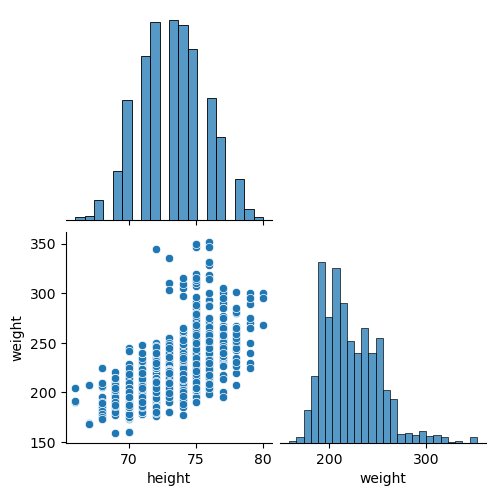

In [53]:
sns.pairplot(nfl_numeric, corner=True)

Datetime isn't quite numerical, so it isn't present in our pairplot. We can however, create an age column to see how exactly that compares to heights and weights. Let's do that:

In [55]:
#fixed_nfl['player_age'] = 2018 - fixed_nfl['birthDate'].dt.year
#2018 - fixed_nfl['birthDate'].dt.year # SERIES
fixed_nfl['player_age'] = 2018 - fixed_nfl['birthDate'].dt.year
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,False,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False,25
...,...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,True,27
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,True,24
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False,26
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False,25


In [56]:
fixed_nfl.dtypes

nflId                   int64
height                  int32
weight                  int64
birthDate      datetime64[ns]
collegeName            object
position               object
displayName            object
fix_height               bool
player_age              int32
dtype: object

Age is already a numeric. Who are our oldest and youngest players?

In [58]:
fixed_nfl.sort_values(by=['player_age', 'birthDate'], ascending= [True, False])

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age
66,2560713,77,250,1998-05-02,Virginia Tech,LB,Tremaine Edmunds,False,20
1053,2560985,72,186,1997-10-04,Southern California,WR,Deontay Burnett,False,21
1208,2560950,73,248,1997-09-12,Toledo,OLB,Ola Adeniyi,False,21
890,2560770,71,208,1997-08-03,Southern California,RB,Ronald Jones,False,21
513,2560765,71,212,1997-06-30,Auburn,RB,Kerryon Johnson,False,21
...,...,...,...,...,...,...,...,...,...
614,2505299,76,255,1980-06-18,Kent State,TE,Antonio Gates,True,38
1258,2505010,79,295,1980-01-18,North Carolina,DE,Julius Peppers,True,38
1145,2505076,76,218,1979-07-04,Sam Houston State,QB,Josh McCown,False,39
302,2504775,72,209,1979-01-15,Purdue,QB,Drew Brees,False,39


It looks like Tremaine Edmunds is our youngest player, and Tom Brady is our oldest player. They are about 20 and 1/2 years apart.

Let's add age to our correlations and pairplot:

In [60]:
new_nfl_numeric = fixed_nfl[['height', 'weight', 'birthDate', 'player_age']]
#new_nfl_numeric
new_nfl_numeric.corr()

,height,weight,birthDate,player_age
height,1.000000,0.661144,-0.088815,0.085319
weight,0.661144,1.000000,-0.114966,0.112628
birthDate,-0.088815,-0.114966,1.000000,-0.995931
player_age,0.085319,0.112628,-0.995931,1.000000


Looks good. Player_age is almost perfectly correlated with birthDate (inversely, since as birthdate goes up, age goes down). It is pretty similarly associated with height and weight. Let's check out new pairplot:

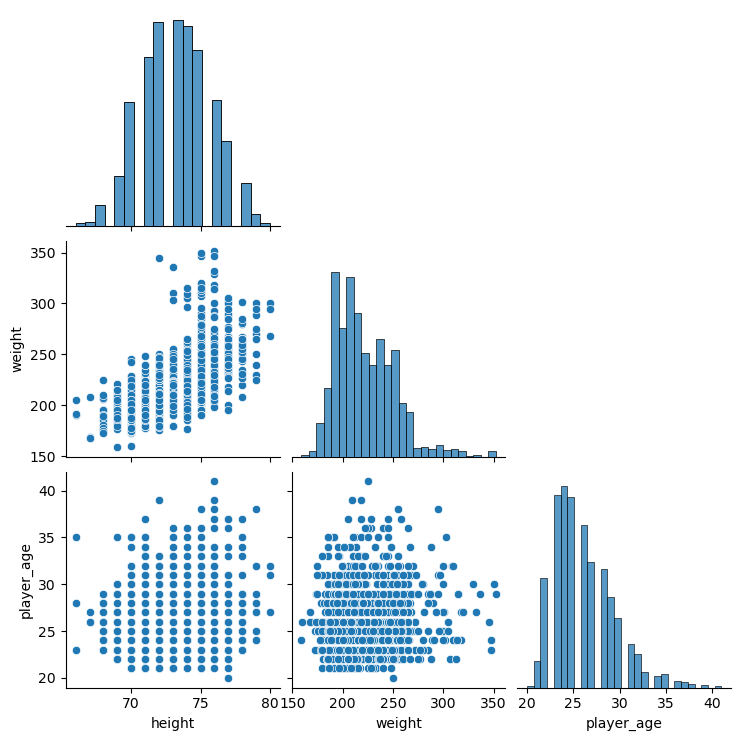

In [62]:
sns.pairplot(new_nfl_numeric, corner=True)

In [63]:
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,False,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False,25
...,...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,True,27
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,True,24
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False,26
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False,25


Now I want to look at some visualizations

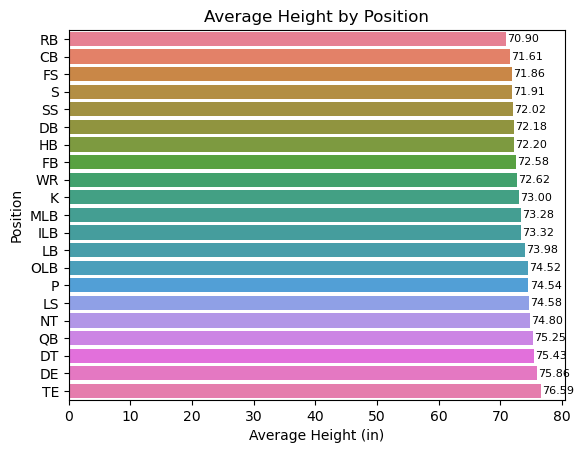

In [65]:
heights_by_position = fixed_nfl.groupby('position')['height'].mean()
heights_by_position = heights_by_position.sort_values(ascending=True)
sns.barplot(x=heights_by_position.values, y=heights_by_position.index, hue=heights_by_position.index)
plt.ylabel('Position')
plt.xlabel('Average Height (in)')
plt.title('Average Height by Position')

for index, value in enumerate(heights_by_position.values):
    plt.text(value + 0.2, index, f'{value:.2f}', va='center', color='black', fontsize=8)

It appears as thought Tight Ends are on average the tallest players, while Running Backs are the shortest. We can do the same thing for weight

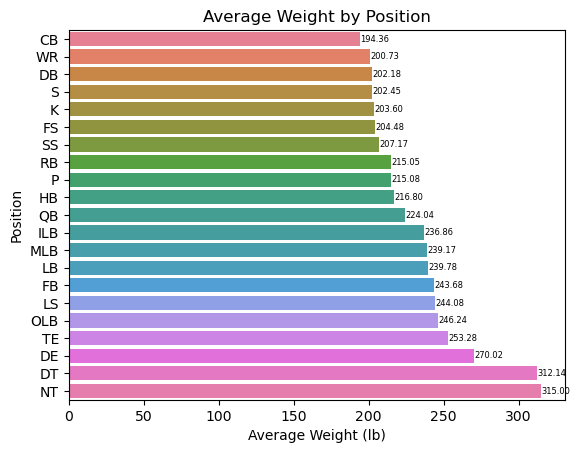

In [67]:
weights_by_position = fixed_nfl.groupby('position')['weight'].mean()
weights_by_position = weights_by_position.sort_values(ascending=True)
sns.barplot(x=weights_by_position.values, y=weights_by_position.index, hue=weights_by_position.index)
plt.ylabel('Position')
plt.xlabel('Average Weight (lb)')
plt.title('Average Weight by Position')

for index, value in enumerate(weights_by_position.values):
    plt.text(value + 0.2, index, f'{value:.2f}', va='center', color='black', fontsize=6)

It appears that cornerbacks and wide receivers are the lightest and nose tackles and defensive tackles are the heaviest. These are the positions that have to move the most and the least respectively, which makes sense.

<Axes: xlabel='height', ylabel='weight'>

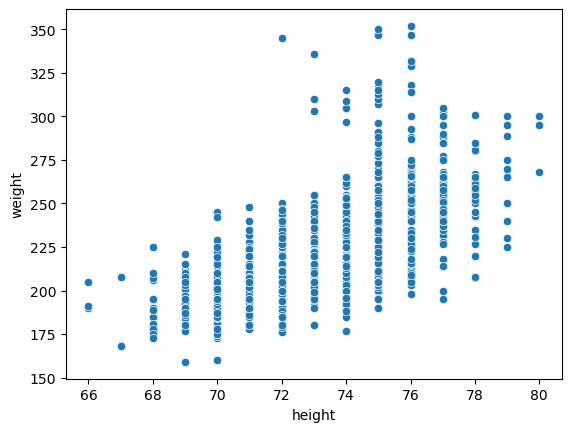

In [69]:
sns.scatterplot(data=fixed_nfl, x='height', y='weight')

Let's check how age is related to position!

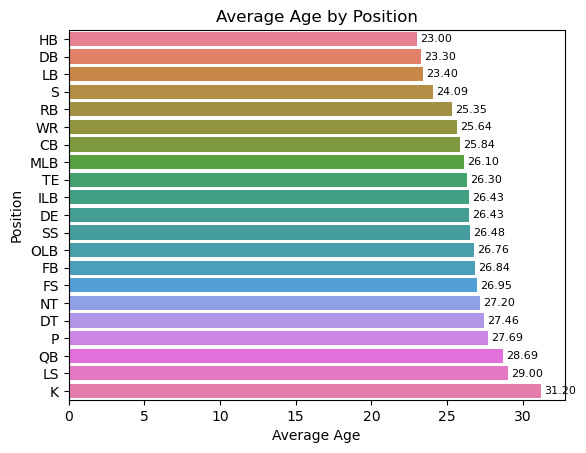

In [71]:
ages_by_position = fixed_nfl.groupby('position')['player_age'].mean()
ages_by_position = ages_by_position.sort_values(ascending=True)
sns.barplot(x=ages_by_position.values, y=ages_by_position.index, hue=ages_by_position.index)
plt.ylabel('Position')
plt.xlabel('Average Age')
plt.title('Average Age by Position')

for index, value in enumerate(ages_by_position.values):
    plt.text(value + 0.2, index, f'{value:.2f}', va='center', color='black', fontsize=8)

It looks like halfbacks and defensive backs are the youngest, and Kickers are the oldest. 

It makes sense that kickers would be the oldest. Obviously, the older you get, the less athletic you become past a certain point. Having experience is great, but getting more means getting older, so teams have to strike a balance of getting players who are experienced yet still are in their athletic prime. Kickers do not have to perform extreme athletic manuevers as often as other positions, so of course teams would want ones who are older, as they would have more experience yet less athletic drawbacks.

HB is a halfback, which is a position that, to my knowledge, does not really exist much in NFL football nowadays. It is basically the same a runningback (RB), which is basically a blanket term for halfbacks, hybridbacks, and tailbacks. Because TB and Hybridbacks are not present in the data, I won't combine RB and HB into one position, but I will keep it in mind for future inferences and predictions.

In [73]:
#Need to reshape?

In [74]:
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,False,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False,25
...,...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,True,27
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,True,24
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False,26
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False,25


Now, let's look at some of the colleges:

In [76]:
fixed_nfl['collegeName'].value_counts()

collegeName
Alabama                     33
Ohio State                  28
Florida State               27
Florida                     26
Louisiana State             25
                            ..
Northwest Missouri State     1
Beloit                       1
Southern Utah                1
Midwestern State             1
Texas Southern               1
Name: count, Length: 251, dtype: int64

In [77]:
np.sum(fixed_nfl['collegeName'].value_counts().values == 1)

103

There are well over 200 colleges here. Makes sense, football players come from all over the country. About half of them have only 1, 2, or 3 players that come from them though. Let's see if we can find the colleges that have more NFL recruited players, we'll strike a balance.

In [79]:
college_counts = fixed_nfl['collegeName'].value_counts()
#college_counts
more_than_12_players = college_counts[college_counts > 12].index
##sum(fixed_nfl['collegeName'].value_counts() > 14)
more_than_12_players

Index(['Alabama', 'Ohio State', 'Florida State', 'Florida', 'Louisiana State',
       'Miami', 'Georgia', 'Clemson', 'Stanford', 'Washington', 'Oklahoma',
       'Notre Dame', 'Auburn', 'Penn State', 'Southern California',
       'South Carolina', 'Texas', 'Texas A&M', 'Central Florida', 'Wisconsin',
       'Tennessee', 'Michigan', 'Mississippi', 'West Virginia', 'Oregon',
       'North Carolina', 'Pittsburgh', 'California', 'Mississippi State',
       'Michigan State', 'Virginia Tech', 'Iowa'],
      dtype='object', name='collegeName')

The lower number of recruits we set as the threshold, the more colleges we get, BUT, those colleges have less data points to use

In [81]:
#more_than_12_players
fixed_nfl[fixed_nfl['collegeName'].isin(more_than_12_players)]
#fixed_nfl['collegeName'].isin(college_counts)

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False,28
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,False,24
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,False,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,False,26
7,2507763,72,200,1986-08-01,Mississippi,WR,Mike Wallace,True,32
...,...,...,...,...,...,...,...,...,...
1283,2560875,72,240,1997-04-20,North Carolina,LB,Andre Smith,False,21
1288,2552379,72,211,1991-12-06,Michigan State,RB,Jeremy Langford,True,27
1289,496816,76,300,1988-02-25,Oklahoma,DT,Gerald McCoy,False,30
1292,2560909,76,347,1995-02-05,Washington,DT,Vita Vea,False,23


In [82]:
#fixed_nfl[fixed_nfl['collegeName'] == 'Stanford']
#fixed_nfl[fixed_nfl['collegeName'] == 'Iowa State']

So, there are way too many schools to properly analyze them all individually, but if we reduce the schools then we lose player data. How can we remedy this?

Perhaps we should look at a conferences instead. Most of the schools NFL players come from are part of some larger NCAA conference, such as PAC-12, BIG-10, or SEC. If we can get data on the schools and what conference they are part of, we can join that data with our fixed_nfl to get a conference associated with each player. Then, we have fewer groups to compare and more data in each group. And schools that are not part of specific conferences or from more obscure ones can be grouped together as "other" or "unaffiliated." 

Our NFL data is from the 2018 portion of the 2018-19 season, so let's get our college football conference data from the 2017-18 year. It is important for us to keep in mind that some conferences do change with restructuring, so these conferences might not be accurate to today's structure, and some of these players' schools may have been in different conferences when they were there or drafted. These are the conferences for 2017-18 academic year.

In [85]:
cfb = pd.read_csv(r"C:\Users\Owen\Documents\Courses\DSCI 311\Project 2\cfb17.csv")
cfb

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
0,Air Force (MWC),12,5,7,49,908,5010,5.52,48,417.5,...,33:27,119,5,5,10,14,6,20,-10,-0.83
1,Akron (MAC),14,7,7,121,906,4424,4.88,38,316.0,...,28:44,19,8,19,27,6,11,17,10,0.71
2,Alabama (SEC),14,13,1,29,944,6217,6.59,64,444.1,...,29:45,5,5,19,24,7,3,10,14,1.00
3,Appalachian St. (Sun Belt),13,9,4,31,886,5718,6.45,55,439.8,...,31:19,11,8,18,26,8,6,14,12,0.92
4,Arizona (Pac-12),13,7,6,12,908,6364,7.01,67,489.5,...,28:37,46,6,19,25,9,13,22,3,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,West Virginia (Big 12),13,7,6,20,941,5975,6.35,55,459.6,...,27:15,105,8,11,19,12,14,26,-7,-0.54
125,Western Ky. (C-USA),13,6,7,69,968,5146,5.32,42,395.8,...,29:22,110,5,10,15,13,10,23,-8,-0.62
126,Western Mich. (MAC),12,6,6,78,856,4675,5.46,45,389.6,...,30:38,20,16,10,26,10,8,18,8,0.67
127,Wisconsin (Big Ten),14,13,1,51,954,5810,6.09,53,415.0,...,35:29,35,9,20,29,9,15,24,5,0.36


In [86]:
cfb.dtypes

Team                             object
Games                             int64
Win                               int64
Loss                              int64
Off.Rank                          int64
                                 ...   
Fumbles.Lost                      int64
Interceptions.Thrown.y            int64
Turnovers.Lost                    int64
Turnover.Margin                   int64
Avg.Turnover.Margin.per.Game    float64
Length: 152, dtype: object

For now, I only am using this dataset for the schools and conferences. However, there is a lot of data here that I may find useful later on. So I will keep it in mind, and perhaps take a look at the correlations between its data a little later on. All except the first column seem to be numerical.

I want to separate the "team" column, which has the team name and the conference in parentheses, into two columns with the team/school and the conference. We will do this with .extract() string method

In [88]:
cfb['Team'].value_counts()

Team
Air Force (MWC)                 1
NC State (ACC)                  1
Southern Miss. (C-USA)          1
Southern California (Pac-12)    1
South Fla. (AAC)                1
                               ..
Idaho (Sun Belt)                1
Houston (AAC)                   1
Hawaii (MWC)                    1
Georgia Tech (ACC)              1
Wyoming (MWC)                   1
Name: count, Length: 129, dtype: int64

The following is a string replacement for the Miami teams. It is a part of a step later, but the following string separation will not work without it:

In [102]:
cfb['Team'] = cfb['Team'].replace('Miami (FL) (ACC)', 'Miami (ACC)')
cfb['Team'] = cfb['Team'].replace('Miami (OH) (MAC)', 'Miami, O. (MAC)')

In [103]:
cfb[['school', 'conference']] = cfb['Team'].str.extract(r'^(.*)\((.*)\)$')

In [104]:
cfb

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,school,conference
0,Air Force (MWC),12,5,7,49,908,5010,5.52,48,417.5,...,5,5,10,14,6,20,-10,-0.83,Air Force,MWC
1,Akron (MAC),14,7,7,121,906,4424,4.88,38,316.0,...,8,19,27,6,11,17,10,0.71,Akron,MAC
2,Alabama (SEC),14,13,1,29,944,6217,6.59,64,444.1,...,5,19,24,7,3,10,14,1.00,Alabama,SEC
3,Appalachian St. (Sun Belt),13,9,4,31,886,5718,6.45,55,439.8,...,8,18,26,8,6,14,12,0.92,Appalachian St.,Sun Belt
4,Arizona (Pac-12),13,7,6,12,908,6364,7.01,67,489.5,...,6,19,25,9,13,22,3,0.23,Arizona,Pac-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,West Virginia (Big 12),13,7,6,20,941,5975,6.35,55,459.6,...,8,11,19,12,14,26,-7,-0.54,West Virginia,Big 12
125,Western Ky. (C-USA),13,6,7,69,968,5146,5.32,42,395.8,...,5,10,15,13,10,23,-8,-0.62,Western Ky.,C-USA
126,Western Mich. (MAC),12,6,6,78,856,4675,5.46,45,389.6,...,16,10,26,10,8,18,8,0.67,Western Mich.,MAC
127,Wisconsin (Big Ten),14,13,1,51,954,5810,6.09,53,415.0,...,9,20,29,9,15,24,5,0.36,Wisconsin,Big Ten


Perfect, they were added to the back of the cfb dataset. Let's make sure the parsing went well by checking for spaces

In [106]:
cfb['school'].str.len()

0      10
1       6
2       8
3      16
4       8
       ..
124    14
125    12
126    14
127    10
128     8
Name: school, Length: 129, dtype: int64

It says Air Force has 10 and Akron has 6, 1 more than is true, let's strip that column

In [108]:
cfb['school'] = cfb['school'].str.strip()
cfb['school'].str.len()

0       9
1       5
2       7
3      15
4       7
       ..
124    13
125    11
126    13
127     9
128     7
Name: school, Length: 129, dtype: int64

Do the same with the conference column

In [110]:
cfb['conference'] = cfb['conference'].str.strip()

In [111]:
cfb

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,school,conference
0,Air Force (MWC),12,5,7,49,908,5010,5.52,48,417.5,...,5,5,10,14,6,20,-10,-0.83,Air Force,MWC
1,Akron (MAC),14,7,7,121,906,4424,4.88,38,316.0,...,8,19,27,6,11,17,10,0.71,Akron,MAC
2,Alabama (SEC),14,13,1,29,944,6217,6.59,64,444.1,...,5,19,24,7,3,10,14,1.00,Alabama,SEC
3,Appalachian St. (Sun Belt),13,9,4,31,886,5718,6.45,55,439.8,...,8,18,26,8,6,14,12,0.92,Appalachian St.,Sun Belt
4,Arizona (Pac-12),13,7,6,12,908,6364,7.01,67,489.5,...,6,19,25,9,13,22,3,0.23,Arizona,Pac-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,West Virginia (Big 12),13,7,6,20,941,5975,6.35,55,459.6,...,8,11,19,12,14,26,-7,-0.54,West Virginia,Big 12
125,Western Ky. (C-USA),13,6,7,69,968,5146,5.32,42,395.8,...,5,10,15,13,10,23,-8,-0.62,Western Ky.,C-USA
126,Western Mich. (MAC),12,6,6,78,856,4675,5.46,45,389.6,...,16,10,26,10,8,18,8,0.67,Western Mich.,MAC
127,Wisconsin (Big Ten),14,13,1,51,954,5810,6.09,53,415.0,...,9,20,29,9,15,24,5,0.36,Wisconsin,Big Ten


We only want the conferences and schools to join on our original set, so let's make it easier by just grabbing those in it's own dataframe. We can always come back to the numerical data later on.

In [113]:
cfb_conferences = cfb[['school', 'conference']]
cfb_conferences

,school,conference
0,Air Force,MWC
1,Akron,MAC
2,Alabama,SEC
3,Appalachian St.,Sun Belt
4,Arizona,Pac-12
...,...,...
124,West Virginia,Big 12
125,Western Ky.,C-USA
126,Western Mich.,MAC
127,Wisconsin,Big Ten


It looks like not all of our schools match. Some are shortened. We might have to change some manually, but let's start by extending all of the state schools to "State" instead of "St."

In [115]:
cfb_conferences['school'] = cfb_conferences['school'].str.replace("St.", "State")

# Let's check that
cfb_conferences[cfb_conferences['school'].str.contains("St.", case=True, na=False)]

C:\Users\Owen\AppData\Local\Temp\ipykernel_26468\1633617231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfb_conferences['school'] = cfb_conferences['school'].str.replace("St.", "State")


,school,conference
3,Appalachian State,Sun Belt
5,Arizona State,Pac-12
7,Arkansas State,Sun Belt
10,Ball State,MAC
12,Boise State,MWC
23,Colorado State,MWC
30,Florida State,ACC
31,Fresno State,MWC
34,Georgia State,Sun Belt
42,Iowa State,Big 12


Now let's check the two school columns against each other, this will make it much easier to manually change the data if needed:

In [117]:
# my_list = []
# for school in cfb_conferences['school'].sort_values(ascending=True):
#     in_both = school in (pd.Series(fixed_nfl['collegeName'].unique()).sort_values(ascending=True))
#     my_list.append(in_both)
# my_list

nfl_schools = pd.Series(fixed_nfl['collegeName'].unique())
nfl_schools_frame = nfl_schools.to_frame()
nfl_schools_frame['in_both'] = nfl_schools_frame[0].isin(cfb_conferences['school'])
nfl_schools_frame[nfl_schools_frame['in_both'] == False].head(50)

,0,in_both
1,Southeastern Louisiana,False
3,Louisiana State,False
6,Mississippi,False
11,Sacramento State,False
15,South Dakota State,False
21,Drake,False
26,Eastern Illinois,False
30,New Hampshire,False
31,Yale,False
36,Texas Christian,False


It looks like we will have to change a number of colleges. We'll mostly focus on the most prominent ones, like LSU and Ole Miss and the Michigan schools. If we discover any later on, we can always change them.

We have to change them within the cfb_conferences dataframe. We'll check back on the nfl_schools_frame every once in a while to make sure it works (Will have to rerun the cell above).

In [122]:
#cfb_conferences['school'] = cfb_conferences['school'].replace('LSU', 'Louisiana State') - Special Case where both are present in nfl_fixed
cfb_conferences['school'] = cfb_conferences['school'].replace('Ole Miss', 'Mississippi')
#cfb_conferences[cfb_conferences['school'].str.contains("Mich", case=True, na=False)]
cfb_conferences['school'] = cfb_conferences['school'].str.replace("Mich.$", "Michigan", regex=True)
cfb_conferences['school'] = cfb_conferences['school'].replace('UNLV', 'Nevada-Las Vegas')
cfb_conferences['school'] = cfb_conferences['school'].replace('SMU', 'Southern Methodist')
cfb_conferences['school'] = cfb_conferences['school'].replace('South Fla.', 'South Florida')
cfb_conferences['school'] = cfb_conferences['school'].replace('Western Ky.', 'Western Kentucky')
cfb_conferences['school'] = cfb_conferences['school'].replace('UConn', 'Connecticut')
cfb_conferences['school'] = cfb_conferences['school'].replace('NC State', 'North Carolina State')
cfb_conferences['school'] = cfb_conferences['school'].replace('Southern Miss.', 'Southern Mississippi')


C:\Users\Owen\AppData\Local\Temp\ipykernel_26468\553160041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfb_conferences['school'] = cfb_conferences['school'].replace('Ole Miss', 'Mississippi')
C:\Users\Owen\AppData\Local\Temp\ipykernel_26468\553160041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfb_conferences['school'] = cfb_conferences['school'].str.replace("Mich.$", "Michigan", regex=True)
C:\Users\Owen\AppData\Local\Temp\ipykernel_26468\553160041.py:5: SettingWithCopyWarning: 
A value is 

In [125]:
fixed_nfl['collegeName'] = fixed_nfl['collegeName'].replace('Louisiana State', 'LSU')
fixed_nfl[fixed_nfl['collegeName'] == 'LSU']

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age
3,2555162,73,227,1994-11-04,LSU,MLB,Deion Jones,False,24
15,2557967,73,230,1994-08-09,LSU,OLB,Duke Riley,False,24
29,2555383,72,191,1994-04-06,LSU,CB,Jalen Mills,False,24
64,2557867,71,192,1995-01-16,LSU,CB,Tre'Davious White,False,23
127,2543488,71,196,1992-11-28,LSU,WR,Jarvis Landry,False,26
238,2540180,69,190,1992-05-13,LSU,FS,Tyrann Mathieu,False,26
271,2543603,73,230,1992-10-20,LSU,RB,Jeremy Hill,False,26
276,2543600,74,225,1991-04-27,LSU,RB,Alfred Blue,True,27
298,2552592,73,227,1994-08-03,LSU,MLB,Kwon Alexander,False,24
325,2557973,72,228,1995-01-18,LSU,RB,Leonard Fournette,False,23


In [133]:
cfb_conferences

,school,conference
0,Air Force,MWC
1,Akron,MAC
2,Alabama,SEC
3,Appalachian State,Sun Belt
4,Arizona,Pac-12
...,...,...
124,West Virginia,Big 12
125,Western Kentucky,C-USA
126,Western Michigan,MAC
127,Wisconsin,Big Ten


Now we can merge the cfb_conferences into the fixed_nfl dataframes.

In [140]:
fixed_nfl = fixed_nfl.merge(cfb_conferences, left_on = 'collegeName', right_on = 'school', how='left').drop(columns=['school'])
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age,conference
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False,28,Pac-12
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False,30,NaN
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False,27,Big Ten
3,2555162,73,227,1994-11-04,LSU,MLB,Deion Jones,False,24,SEC
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False,25,Big Ten
...,...,...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,True,27,SEC
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,True,24,ACC
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False,26,Pac-12
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False,25,NaN


Let's rename the conference column so it's more clear that we are referring to colleges.

In [142]:
fixed_nfl.rename({'conference': 'collegeConference'}, axis=1, inplace=True)
#fixed_nfl

In [143]:
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age,collegeConference
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,False,28,Pac-12
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False,30,NaN
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,False,27,Big Ten
3,2555162,73,227,1994-11-04,LSU,MLB,Deion Jones,False,24,SEC
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,False,25,Big Ten
...,...,...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,True,27,SEC
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,True,24,ACC
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,False,26,Pac-12
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,False,25,NaN


In [144]:
fixed_nfl[fixed_nfl['collegeConference'].isna()]
#fixed_nfl[fixed_nfl['collegeName'] == 'USC']


,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age,collegeConference
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,False,30,NaN
12,2553502,68,190,1993-04-10,Sacramento State,WR,DeAndre Carter,False,25,NaN
17,2560995,77,256,1995-01-03,South Dakota State,TE,Dallas Goedert,False,23,NaN
24,2558023,77,253,1994-05-01,Drake,TE,Eric Saubert,False,24,NaN
30,2556363,74,230,1994-05-16,Eastern Illinois,OLB,Kamu Grugier-Hill,False,24,NaN
...,...,...,...,...,...,...,...,...,...,...
1267,2555486,77,245,1993-07-30,South Carolina State,TE,Temarrick Hemingway,False,25,NaN
1272,2506677,70,201,1984-08-10,Central Florida,K,Matt Prater,False,34,NaN
1280,2557850,67,208,1992-11-24,Coastal Carolina,RB,De'Angelo Henderson Sr.,True,26,NaN
1294,2561359,72,180,1995-03-19,Texas Southern,WR,Darvin Kidsy,False,23,NaN


Just looking at the NA values, it seems that we can fix USC as well.

In [146]:
fixed_nfl.loc[fixed_nfl['collegeName'] == 'USC', 'collegeConference'] = 'Pac-12'

In [147]:
fixed_nfl[fixed_nfl['collegeName'] == 'USC']

,nflId,height,weight,birthDate,collegeName,position,displayName,fix_height,player_age,collegeConference
210,2539309,74,215,1991-01-26,USC,SS,T.J. McDonald,True,27,Pac-12
357,2532835,77,255,1988-10-03,USC,TE,Rhett Ellison,True,30,Pac-12
485,2533048,75,265,1990-04-12,USC,OLB,Nick Perry,True,28,Pac-12
547,2506562,76,225,1982-05-17,USC,QB,Matt Cassel,True,36,Pac-12
708,2495251,71,184,1987-04-08,USC,CB,Shareece Wright,True,31,Pac-12
815,2556603,72,235,1993-08-16,USC,FB,Tre Madden,True,25,Pac-12
1025,2552259,73,197,1992-03-27,USC,CB,Josh Shaw,True,26,Pac-12
1124,2555345,73,224,1995-07-07,USC,DB,Su'a Cravens,True,23,Pac-12
1153,2552313,72,235,1992-04-18,USC,MLB,Hayes Pullard,True,26,Pac-12
1215,79858,74,232,1986-11-11,USC,QB,Mark Sanchez,True,32,Pac-12


Let's change all NA values to "other"

In [149]:
fixed_nfl.loc[fixed_nfl['collegeConference'].isna(), 'collegeConference'] = 'Other'

There are still quite a few "Others," but let's see some visualization for what we have.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'SEC'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'ACC'),
  Text(3, 0, 'Big Ten'),
  Text(4, 0, 'Pac-12'),
  Text(5, 0, 'Big 12'),
  Text(6, 0, 'AAC'),
  Text(7, 0, 'MWC'),
  Text(8, 0, 'C-USA'),
  Text(9, 0, 'MAC'),
  Text(10, 0, 'FBS Independent'),
  Text(11, 0, 'Sun Belt'),
  Text(12, 0, 'Independent')])

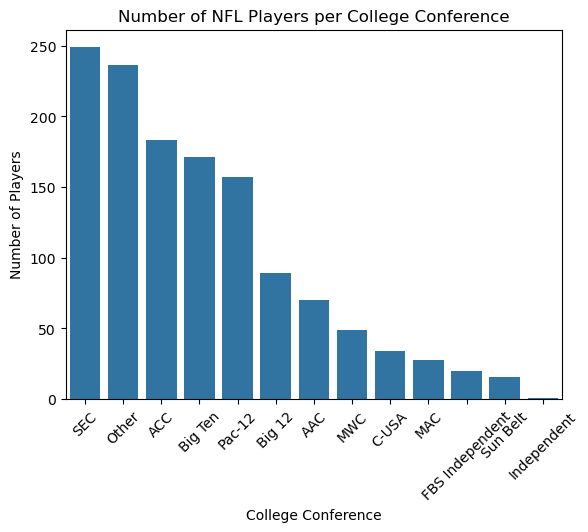

In [151]:
conference_values = fixed_nfl['collegeConference'].value_counts()

sns.barplot(x=conference_values.index, y=conference_values.values)

plt.xlabel('College Conference')
plt.ylabel('Number of Players')
plt.title('Number of NFL Players per College Conference')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'AAC'),
  Text(1, 0, 'ACC'),
  Text(2, 0, 'Big 12'),
  Text(3, 0, 'Big Ten'),
  Text(4, 0, 'C-USA'),
  Text(5, 0, 'FBS Independent'),
  Text(6, 0, 'Independent'),
  Text(7, 0, 'MAC'),
  Text(8, 0, 'MWC'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Pac-12'),
  Text(11, 0, 'SEC'),
  Text(12, 0, 'Sun Belt')])

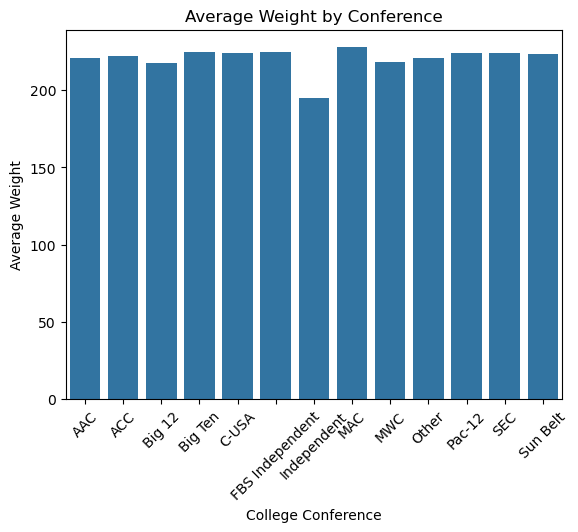

In [152]:
weight_by_conference = fixed_nfl.groupby('collegeConference')['weight'].mean()

sns.barplot(x=weight_by_conference.index, y=weight_by_conference.values)
plt.title('Average Weight by Conference')
plt.xlabel('College Conference')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)

# for index, value in enumerate(weight_by_conference.values):
#     plt.text(value + 0.2, index, f'{value:.2f}', va='', color='black', fontsize=4)

In [153]:
fixed_nfl = fixed_nfl.drop(columns=['fix_height'])

In [154]:
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,player_age,collegeConference
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,28,Pac-12
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,30,Other
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,27,Big Ten
3,2555162,73,227,1994-11-04,LSU,MLB,Deion Jones,24,SEC
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25,Big Ten
...,...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,27,SEC
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,24,ACC
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,26,Pac-12
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,25,Other


### Initial Impressions:
I have a fair amount of categorical data. But I also some good numerical data that might be useful in pairing with some of those categories. I am particularly curious about heights/weights grouped by positions, and with the new conferences I pulled in, I wonder about which conferences have the most height or weight at certain positions. Furthermore, I am curious whether you could predict the college or more likely conference of a player in the NFL based on their size, age, and position. That might reveal what colleges look for in recruitment for specific positions. Perhaps tall, yet light receivers in the NFL are more likely to come from the Pac-12, and heavier, shorter running backs come more often from the SEC. We could get more position specific in our precictions as well. Someone who is older in our dataset has been in the league a long time. Perhaps their height/weight at their position is a good reason, and maybe that can be used to determine which conferences have longest lasting NFL players. 

The positions themselves are particularly interesting to me. What makes a good player at each position? Are there any trends for younger vs older players at each position? etc.

I don't think I will, but if I struggle to really find something to predict, I also have backup college football team statistics from the year prior to this, which can possibly be used by itself or in conjuction with the NFL data I have in other ways. 

In [156]:
fixed_nfl[fixed_nfl['collegeConference'] == 'Other']['collegeName'].value_counts().head(10)

collegeName
Central Florida         16
North Dakota State       6
Brigham Young            6
Texas Christian          6
Florida Atlantic         5
Harvard                  5
Northern Illinois        5
South Carolina State     4
West Alabama             4
Eastern Washington       4
Name: count, dtype: int64

Below is just some copy-pasted brute force work of fixing some of the values that did not have a conference associated with them. I did this after my exploration section and just wanted to have a few more data points in each conference, so I added any college missing a conference that had 4 or more players in the NFL.

In [158]:
#fixed_nfl[fixed_nfl['collegeName'] == 'Central Florida']
fixed_nfl.loc[fixed_nfl["collegeName"] == "Central Florida", "collegeConference"] = "AAC" #Were in AAC up until 2021
fixed_nfl.loc[fixed_nfl["collegeName"] == "North Dakota State", "collegeConference"] = "MVFC"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Texas Christian", "collegeConference"] = "Big 12"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Northern Illinois", "collegeConference"] = "MAC"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Illinois State", "collegeConference"] = "MVFC"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Florida Atlantic", "collegeConference"] = "AAC"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Eastern Washington", "collegeConference"] = "Big Sky"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Georgia Southern", "collegeConference"] = "Sun Belt"
fixed_nfl.loc[fixed_nfl["collegeName"] == "James Madison", "collegeConference"] = "Sun Belt"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Coastal Carolina", "collegeConference"] = "Sun Belt"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Portland State", "collegeConference"] = "Big Sky"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Miami (Fla.)", "collegeConference"] = "ACC"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Middle Tennessee", "collegeConference"] = "C-USA"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Northern Iowa", "collegeConference"] = "MVFC"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Samford", "collegeConference"] = "SoCon"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Western Carolina", "collegeConference"] = "SoCon"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Alabama-Birmingham", "collegeConference"] = "AAC"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Louisiana-Lafayette", "collegeConference"] = "Sun Belt"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Florida International", "collegeConference"] = "C-USA"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Sacramento State", "collegeConference"] = "Big Sky"
fixed_nfl.loc[fixed_nfl["collegeName"] == "Chattanooga", "collegeConference"] = "SoCon"

In [162]:
#fixed_nfl[fixed_nfl['collegeName'] == 'Central Florida']

In [163]:
fixed_nfl[fixed_nfl['collegeConference'] == 'Other']['collegeName'].value_counts().head(10)

collegeName
Brigham Young           6
Harvard                 5
Delaware                4
South Carolina State    4
West Alabama            4
San Diego               3
California, Pa.         2
Jacksonville State      2
North Carolina A&T      2
Eastern Kentucky        2
Name: count, dtype: int64

In [164]:
fixed_nfl[fixed_nfl['collegeConference'] == 'AAC']

,nflId,height,weight,birthDate,collegeName,position,displayName,player_age,collegeConference
33,2552418,70,192,1991-12-18,East Carolina,WR,Justin Hardy,27,AAC
47,2495139,75,246,1989-02-13,Tulsa,TE,Charles Clay,29,AAC
50,2557863,74,200,1995-03-30,East Carolina,WR,Zay Jones,23,AAC
57,2555378,69,185,1994-03-14,Temple,CB,Tavon Young,24,AAC
80,2555209,73,200,1993-06-16,Cincinnati,WR,Chris Moore,25,AAC
...,...,...,...,...,...,...,...,...,...
1272,2506677,70,201,1984-08-10,Central Florida,K,Matt Prater,34,AAC
1281,2556530,71,190,1993-08-30,Memphis,WR,Mose Frazier,25,AAC
1284,2549982,76,230,1991-07-01,Southern Methodist,QB,Garrett Gilbert,27,AAC
1290,496843,77,275,1989-01-01,South Florida,OLB,Jason Pierre-Paul,29,AAC


In [165]:
fixed_nfl[fixed_nfl['displayName'] == 'Phil Dawson']

,nflId,height,weight,birthDate,collegeName,position,displayName,player_age,collegeConference


In [167]:
#nfl_career = pd.read_csv(r"C:\Users\Owen\Documents\Courses\DSCI 311\Project 2\NFL Player Stats(1922 - 2022).csv")

In [169]:
#nfl_career.dtypes

In [170]:
#nfl_career[nfl_career['Player'] == 'Tom Brady']

In [171]:
# relevant_columns = ['Season', 'Player', 'Tm', 'Age', 'Pos']
# nfl_rel = nfl_career[relevant_columns]
# nfl_rel

# player_seasons = (
#     nfl_rel.groupby('Player')['Season']
#     .agg(['min', 'max']) 
#     .assign(SeasonsPlayed=lambda x: x['max'] - x['min'] + 1)  
#     .reset_index() 
# )

#player_seasons#[player_seasons['Player'] == 'Tom Brady']

In [172]:
# new_nfl = pd.merge(fixed_nfl, player_seasons[['Player', 'SeasonsPlayed']], left_on = 'displayName', right_on='Player', how='left')
# #new_nfl

In [173]:
#new_nfl[new_nfl['SeasonsPlayed'].isna()]
#np.sum(new_nfl['SeasonsPlayed'].isna())

In [174]:
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,player_age,collegeConference
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,28,Pac-12
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,30,Other
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,27,Big Ten
3,2555162,73,227,1994-11-04,LSU,MLB,Deion Jones,24,SEC
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25,Big Ten
...,...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,27,SEC
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,24,ACC
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,26,Pac-12
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,25,AAC


In [175]:
fixed_nfl['collegeConference'].value_counts()

collegeConference
SEC                249
ACC                186
Big Ten            171
Pac-12             157
Other              154
Big 12              95
AAC                 94
MWC                 49
C-USA               39
MAC                 33
Sun Belt            27
FBS Independent     20
MVFC                12
Big Sky              9
SoCon                7
Independent          1
Name: count, dtype: int64

# Inference

What features lead to pull towards a position --> what can we infer about the world from that.

Make a hypothesis, what can you learn from that, evaluate the association, bootstrap to create a confidence interval. 

I'm interested in what conferences produce what size of players. For instance, the SEC is widely considered the football powerhouse conference. I might expect players in the NFL who played in the SEC to be significantly bigger than NFL players who played in other conferences. I could combine height and weight into its own variable "size", but I would rather look at both of them separately to see their differences.

**Alternative Hypothesis**: At least one college conference produces players with significantly different mean heights (or weights) compared to the other conferences.

**Null Hypothesis**: The average height and weight of NFL players does not vary significantly across college conferences.

In [179]:
np.sum(fixed_nfl['collegeConference'].value_counts() >= 20)

12

To analyze this question, we will look at the mean heights and weights of NFL players from most of the conferences in our data.

I will avoid using conferences that have less than 20 NFL players from them so that I have more data points, which still gives us 11 conferences to look at + "Other".

We will use an ANOVA (Analysis of Variance) test to compare our groups means/variances against each other, looking for any notable differences. This test does not have high variance in itself, making it good for inference. We will do a one-way ANOVA test with each of height and weight. We did not learn this in lecture, but it was mentioned. I found information on what the test is here: https://www.scribbr.com/statistics/one-way-anova/#:~:text=ANOVA%2C%20which%20stands%20for%20Analysis,ANOVA%20uses%20two%20independent%20variables
and am using these site to learn how to apply one in python: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html and https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

First, let's filter out only the conferences with 20+ players.

In [182]:
confs = fixed_nfl['collegeConference'].value_counts()
valid_confs = confs[confs >= 20].index
filtered_nfl = fixed_nfl[fixed_nfl['collegeConference'].isin(valid_confs)]
#confs
#valid_confs
filtered_nfl.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,player_age,collegeConference
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,28,Pac-12
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,30,Other
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,27,Big Ten
3,2555162,73,227,1994-11-04,LSU,MLB,Deion Jones,24,SEC
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25,Big Ten


Let's just plot the means of height and weight for each conference to get an idea of what we're testing:

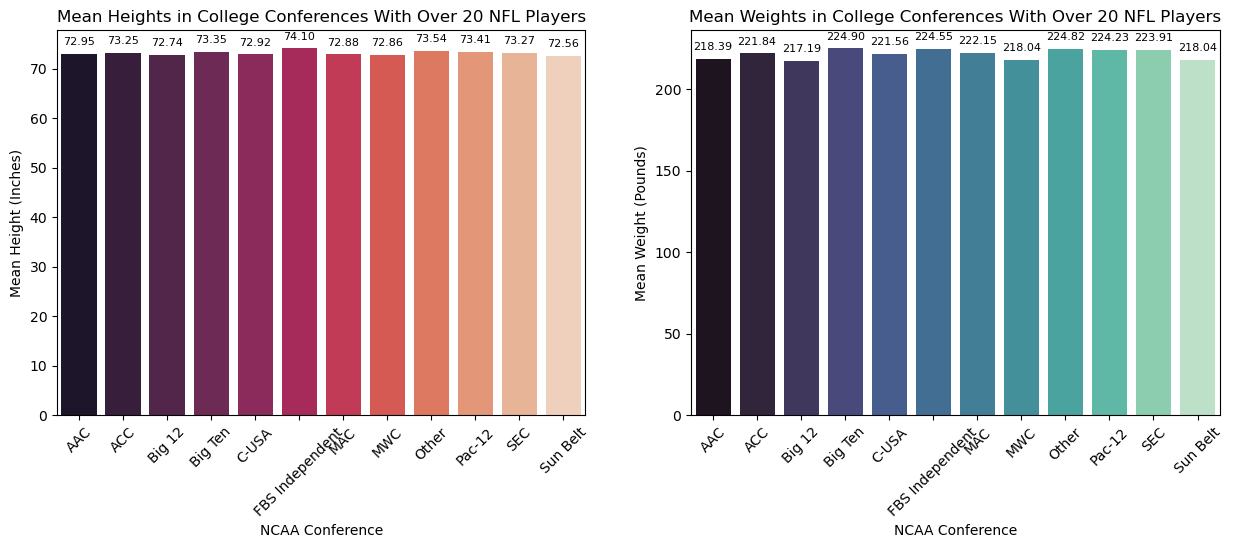

In [184]:
mean_vals = filtered_nfl.groupby('collegeConference')[['height', 'weight']].mean().reset_index()

plt.figure(figsize=(15, 5))

# One for Height
plt.subplot(1, 2, 1)
plt1 = sns.barplot(data=mean_vals, x='collegeConference', y='height', hue='collegeConference', palette='rocket')
plt.title('Mean Heights in College Conferences With Over 20 NFL Players')
plt.xlabel('NCAA Conference')
plt.ylabel('Mean Height (Inches)')
plt.xticks(rotation=45)

# Adding ticks
for val in plt1.patches:
    plt1.annotate(f'{val.get_height():.2f}', 
                 (val.get_x() + val.get_width() / 2., val.get_height()), 
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points', 
                 ha='center', va='bottom', fontsize=8, color='black')

# One for Weight
plt.subplot(1, 2, 2)
plt2 = sns.barplot(data=mean_vals, x='collegeConference', y='weight', hue='collegeConference', palette='mako')
plt.title('Mean Weights in College Conferences With Over 20 NFL Players')
plt.xlabel('NCAA Conference')
plt.ylabel('Mean Weight (Pounds)')
plt.xticks(rotation=45)

for val in plt2.patches:
    plt2.annotate(f'{val.get_height():.2f}', 
                 (val.get_x() + val.get_width() / 2., val.get_height()), 
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points', 
                 ha='center', va='bottom', fontsize=8)


Now we begin our analysis with height:

In [186]:
from scipy.stats import f_oneway

#filtered_nfl.groupby('collegeConference')['height'].mean()
height_groups = [group['height'].values for _, group in filtered_nfl.groupby('collegeConference')]
one_way_results_height = f_oneway(*height_groups)
one_way_results_height

F_onewayResult(statistic=1.4288627207256122, pvalue=0.15359133079569412)

In this first part of our analysis, we tested whether the average height of NFL players differed significantly based on their college's athletic conference. Let us first recognize that our null hypothesis (for height portion) was that the mean height of NFL players does not vary significantly by college conference. In this case, we got an f-statistic, not a t-statistic. Where a t-statistic compares means between two groups for statistical differences, an f-statistic can compare between multiple different groups and (according to the resources I was using) will be able to tell you if there is significant difference between any pair of the groups.

For height, we got an f-statistic of ~1.429. This is relatively low, as it is very close to 1, and it indicates that even if the variability within groups somewhat large (like as a result of positions), the variability *between* groups (conference averages) is rather low in comparison. By that statistic, we can likely say that there is no huge difference in NFL players heights based upon what conference they were in in college.

The p-value is a low 0.154. The most typical p-value cutoff we use is 0.05. Because our p-value is much larger than the cutoff, it can be reasonably said that any variation between the groups is likely due to chance. These results suggest that we have low confidence in rejecting the null hypothesis, and thus we fail to reject it.

In other words: The difference in average height of NFL players is not statistically significant across all college conferences.

Now, let's do the same thing but for weights:

In [189]:
weight_groups = [group['weight'].values for _, group in filtered_nfl.groupby('collegeConference')]
one_way_results_weight = f_oneway(*weight_groups)

In this section of our analysis, we tested whether college conference has any bearing on weights of NFL players. Let us restate that our null hypothesis (for weight portion) was that the mean weight of NFL players does not vary significantly by college conference. Again we got an f-statistic and a p-value from our ANOVA one way test. 

Our weight f-statistic is ~0.9164. This is even closer to 1, and it indicates that our weight variability between conferences is lower than that of within the individual groups, and even moreso than in our height analysis. We obtained a corresponding p-value of around 0.524, which is much larger than the standard cutoff of 0.05. This p-value again indicates a low confidence in rejecting the null hypothesis.

Given such results, we again fail to reject the null hypothesis, or, in other words, our findings are strong evidence that the average weight of NFL players does not appear to vary significantly by college conference, as any observed numerical differences are most likely a result of chance.

And thus we fail to reject the overall null hypothesis that the average height and weight of NFL players does not differ significantly across college conferences.

#### Thoughts:

Honestly, I was actually expecting there to be a significant difference in means for at least some of the conferences. One of my prediction was that the SEC would dominate the others, especially in weight category. It seems as though SEC players, especially linemen, tend to be much heavier than the other conferences' players. Not only was that not true, but weight had *even less* variation between groups than height did, which I thought was strange since weights vary so much more than heights ever can. I suppose my findings indicate that conferences do not really get large streams of recruits that are much bigger than the recruits of others. This makes sense, since teams are generally made up of the same amount of each position, and each position group will have its own mean heights and weights that don't greatly vary. In a greater scale, this does not *prove* but may indicate that roughly all positions are represented from all conferences in the NFL. Otherwise, if for example many NFL lineman come from the PAC-12, we might see a greater f-statistic in the weight analysis in favor of PAC-12 (since our initial grouping was by conference, not position).

#### Assumptions:
In terms of assumptions: 
1. Our ANOVA test assumes that our observations are independent of each other. This is a valid assumption for our set, since players' heights and weights do not rest upon the heights and weights of others.
2. Our data should be approximately normal, which both of our NFL heights and weights variables are (See histograms below). Weights skew right since there more heavier players like linemen on a single team, but that should be representative of all teams and ideally across all conferences.
3. Random sampling is an assumption of an ANOVA test, and this may not always be true. Certain positions will always be represented more than others, and players are drafted based on a team's needs, not necessarily the makeup of that player. In our case though, there are a number of representations of many sizes at each position, and the distribution of positions in the NFL will remain relatively constant, so that's the population we have to work with.

#### Considerations:
I think it is important to note that a test such as this may be inherently flawed by the idea that the NFL will tend to draft guys that fit the "perfect" size/frame for their position. A heavier or lighter player might not be in the dataset because they were not drafted into the NFL league. Additionally, it is possible and even likely that players drafted into the NFL might grow more (if they are young) and will almost certainly fill out their frames even more, increasing their weight in their first few NFL years. Thus these given heights, but more importantly weights may not vary as much as when these players were in college. It is still very much possible that the SEC does have significant sizae advantage, it's just that we discovered with this test that we cannot glean that just from those players who made it into the NFL. In a dataset with a huge amount of college athletes, we could do a similar test and find very different findings with that data. Lastly, I think it's important to remember that this dataset is for the 2018 NFL season. Players change, conferences realign (especially in recent years), and certain strategies leave in the NFL along with the players. As such, it is very possible for these findings to be different now, 6 years later.

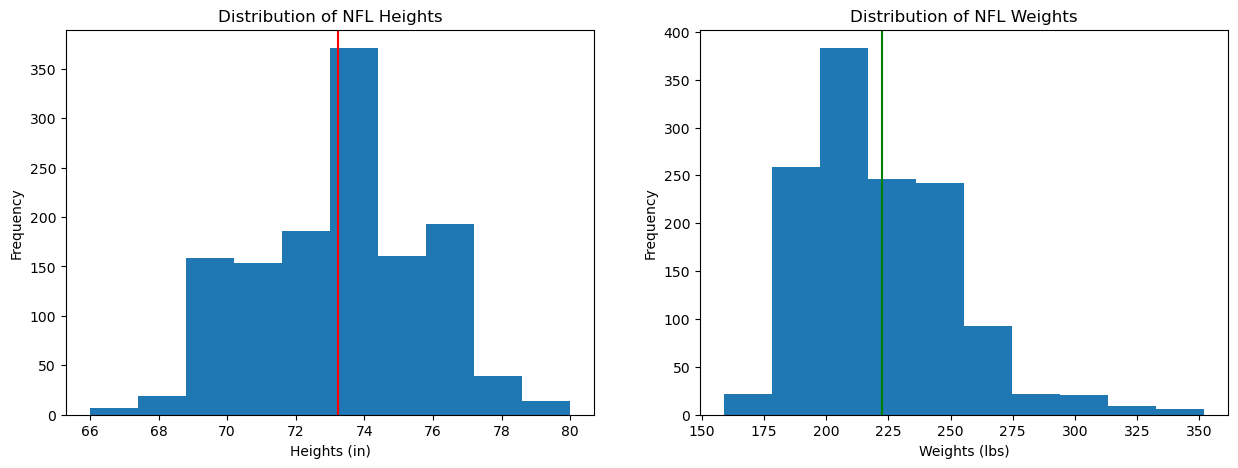

In [192]:
plt.figure(figsize=(15, 5))

# One for Height
plt.subplot(1, 2, 1)
plt.hist(fixed_nfl['height'])
plt.xlabel("Heights (in)")
plt.ylabel("Frequency")
plt.title("Distribution of NFL Heights")
plt.axvline(np.mean(fixed_nfl['height']), color='red')

# One for Weight
plt.subplot(1, 2, 2)
plt.hist(fixed_nfl['weight'])
plt.xlabel("Weights (lbs)")
plt.ylabel("Frequency")
plt.title("Distribution of NFL Weights")
plt.axvline(np.mean(fixed_nfl['weight']), color='green')

# Prediction

Try different models, even if it's a hard thing to predict, showing that you tried different approaches to predicting that variable is enough to get credit --> just wants to see that I tried to look for ways to reduce error and ways to predict.


Don't really care about how much each feature affects the thing we are trying to predict, purely trying to see what we can find out.

Question: Can we predict a player's position based on their age, height, weight, and perhaps conference as well?

To do this, we will conduct a train-test split on our data, and then use a model to try and predict positions based on the features with the least loss.

In [197]:
#fixed_nfl[fixed_nfl['position'] == 'RB']
fixed_nfl['position'].value_counts()
#fixed_nfl.head()

position
WR     228
CB     195
RB     135
TE     128
OLB    100
QB      71
FS      65
SS      58
LB      58
ILB     56
DE      49
DB      33
MLB     29
DT      28
FB      19
P       13
LS      12
S       11
HB       5
NT       5
K        5
Name: count, dtype: int64

I am somewhat concerned about the AMOUNT of groups our model needs to choose between when predicting. There are so many positions, and some are certainly very closely related to others.

Additionally, some of the positions, especially the bottom 3 (HB, NT, and K) have very few observations in my data, and thus may not provide enough reliable data to accurately classify those positions. I am unsure whether this will effect the model as a whole though.

I have 3 possible solutions assuming that it does hurt the model:
1. I could abolish those positions altogether, K, HB, and NT are not hugely important positions to begin with and I could just take those (and possibly others if necessary) out of my dataframe completely. The issue with that is I am not sure how it will effect the predictions of the other positions. Would those change?
2. I could merge those positions. This wouldn't work for Kicker, so solution 1 might still have to apply there, but Halfback (HB) and Nose Tackle (NT) are essentially just subtypes of greater positions (Runningbacks and Defensive Tackles). I could merge those subtypes with their parent positions, which would solve the sample size problem. However, these subtypes exist for a reason, and could have notable differences from their parents. Merging them with their parents will taint the parents' group data, effecting the model, perhaps not by much, but almost certainly affecting it.
3. Like opion 1, I could reduce the number of positions I am classifying between as a whole. I might choose to only try and classify between WR, CB, RB, TE, QB, OLB, and maybe a safety. Those are generally the most notable and important positions on the field + LB, and they encompass the vast majority of body types and skills in football. **This is what I think will end up being done**

I think I will try the model as it stands first, and see how it goes. If my accuracy is 95% normally then none of this matters. I'll adjust my approach as I see fit.

In [201]:
# plt.hist(fixed_nfl['player_age'])

In [202]:
fixed_nfl

,nflId,height,weight,birthDate,collegeName,position,displayName,player_age,collegeConference
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,28,Pac-12
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,30,Other
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,27,Big Ten
3,2555162,73,227,1994-11-04,LSU,MLB,Deion Jones,24,SEC
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25,Big Ten
...,...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,27,SEC
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,24,ACC
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,26,Pac-12
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,25,AAC


Let's get all our possible features in a dataframe and our positions we want to predict. Lets first look at what our clusters might look like. We will also have to convert our positions to numbers in order to get our random forest classifier to work:

C:\Users\Owen\AppData\Local\Temp\ipykernel_26468\283998140.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pred_df.loc[:,"position"] = pred_df["position"].replace(["WR","CB", "RB", "TE", "OLB", 'QB',


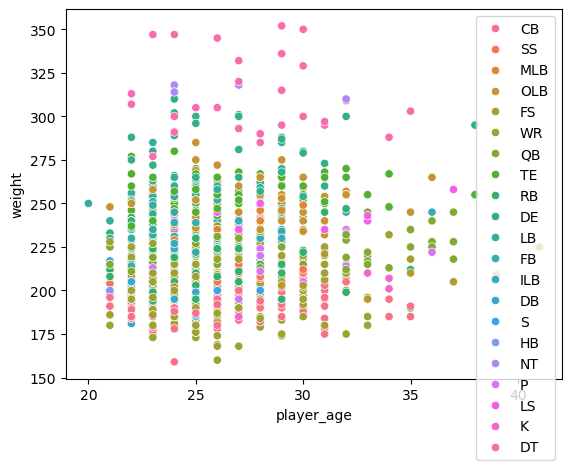

In [204]:
pred_df = fixed_nfl[['height','weight', 'player_age', 'position']]
sns.scatterplot(x=pred_df['player_age'], y=pred_df['weight'], hue=pred_df['position'])
plt.legend()
pred_df.loc[:,"position"] = pred_df["position"].replace(["WR","CB", "RB", "TE", "OLB", 'QB',
                                                    'FS', 'SS', 'LB', 'ILB', 'DE', 'DB',
                                                    'MLB', 'DT', 'FB', 'P', 'LS', 'S', 'HB',
                                                    'NT', 'K'], [0, 1, 2, 3, 4,
                                                                5, 6, 7, 8, 9,
                                                                10, 11, 12, 13, 14,
                                                                15, 16, 17, 18, 19, 20])
X = pred_df.drop("position", axis = 1)
y = pred_df['position']

It looks like our clusters are not very clear. There is not a lot of clear sections of data points, and it's pretty scattered. It is possible though that we can't see some clear clusters because the points are too close together. Let's do our classifier to see.

Now let's fit the model. I will start without the train-test split because I want to see the results without it first.

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

rfc = RandomForestClassifier()

rfc_fit = rfc.fit(X, y.astype(int))
y_preds = rfc_fit.predict(X)

#log_loss(y_preds, y) # Positions are strings right now, do they have to be replaced by numbers?

# y_proba = rfc_fit.predict_proba(X)
# loss = log_loss(y, y_proba)
# loss


Let's see how accurate our model was:

In [209]:
accuracy = np.sum(y_preds == y) / len(y)
accuracy

0.9017651573292402

90% accuracy is pretty good from the general perspective. However, the class imbalance still concerns me. If our model classified **everything** as a WR (0), the model would still be 5% correct. It doesn't seem like much, but what if the model is bias towards the top 3 or 4 classes, then only guessing those classes the model could get up to 40-55% correct. Let's try and check our bias.

In [211]:
pd.Series(y_preds).value_counts()

0     238
1     202
3     138
2     128
4     104
5      66
6      63
8      56
7      55
9      53
10     43
12     32
11     32
13     27
14     17
15     12
17     10
16     10
18      6
19      6
20      5
Name: count, dtype: int64

The distribution of values very much follows what our original position values were.

We can use a confusion matrix to actually look at which values were misidentified: (see ISLR pg. 171 and https://scikit-learn.org/dev/modules/generated/sklearn.metrics.confusion_matrix.html)

First we have to ensure our y and y_pred data types match:

In [214]:
print(f"y dtype: {y.dtype}, unique: {np.unique(y)}")
print(f"y_preds dtype: {y_preds.dtype}, unique: {np.unique(y_preds)}")

y dtype: object, unique: [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20]
y_preds dtype: int32, unique: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [215]:
y = y.astype(int)

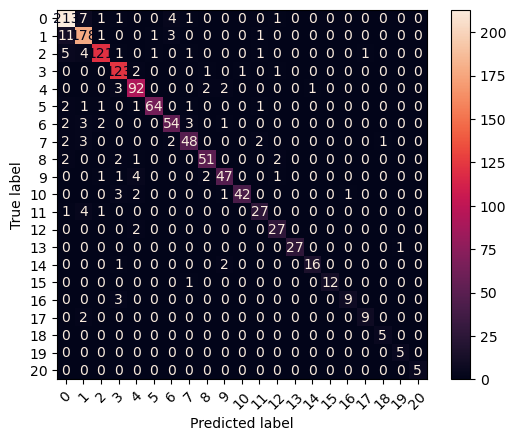

In [216]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=rfc.classes_)
disp.plot(cmap='rocket', xticks_rotation=45)

Let's use our position legend to actually make sense of it:

WR (Wide Receiver): 0
CB (Cornerback): 1
RB (Running Back): 2
TE (Tight End): 3
OLB (Outside Linebacker): 4
QB (Quarterback): 5
FS (Free Safety): 6
SS (Strong Safety): 7
LB (Linebacker): 8
ILB (Inside Linebacker): 9
DE (Defensive End): 10
DB (Defensive Back): 11
MLB (Middle Linebacker): 12
DT (Defensive Tackle): 13
FB (Fullback): 14
P (Punter): 15
LS (Long Snapper): 16
S (Safety): 17
HB (Halfback): 18
NT (Nose Tackle): 19
K (Kicker): 20

It looks like our most common misprediction was predicting a wide receiver as a corner back. This happened 10 times. It also seems we mispredict wide receivers as free and strong safeties sometimes. These midpredictions would make sense however, since CBs, FS, and SS are the ones covering the receivers and thus need to somewhat match their characteristics. 

The worrying thing here might be that we didn't misidentify the bottom 3 (and even 5) positions at all. For us to not misinterpret any of those makes me think there might be something wrong with our model, such as overfitting.

Let's train-test split our data with k-fold cross-validation to see.

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#Let's reset our X and y just to make sure it's the same as before:
X = pred_df.drop("position", axis = 1)
y = pred_df['position']
y = y.astype(int) #Wanted?

X_train, X_holdout, Y_train, Y_holdout = train_test_split(X, y, test_size = 0.15)

max_depths = np.arange(1, 15)

kf = KFold(n_splits = 5)
depth_accuracy = np.empty(0)

for i in max_depths:
    current_rfc = RandomForestClassifier(max_depth = i)
    
    total_accuracy = np.empty(0)
    for train_idx, acc_idx in kf.split(X_train):

        split_X_train, split_X_acc = X_train.iloc[train_idx,:], X_train.iloc[acc_idx,:]
        split_Y_train, split_Y_acc = Y_train.iloc[train_idx], Y_train.iloc[acc_idx]

        current_rfc.fit(split_X_train, split_Y_train)
        current_y_preds = current_rfc.predict(split_X_acc)

        total_accuracy = np.append(total_accuracy, (np.sum(current_y_preds == split_Y_acc) / len(split_Y_acc)))

    depth_accuracy = np.append(depth_accuracy, np.mean(total_accuracy))

In [220]:
depth_and_accuracy = pd.DataFrame({'depth': max_depths, "accuracy": depth_accuracy})
depth_and_accuracy.sort_values('depth', ascending=True)

,depth,accuracy
0,1,0.254727
1,2,0.327903
2,3,0.373059
3,4,0.401981
4,5,0.422763
5,6,0.430904
6,7,0.435396
7,8,0.421846
8,9,0.404668
9,10,0.397456


ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (21).

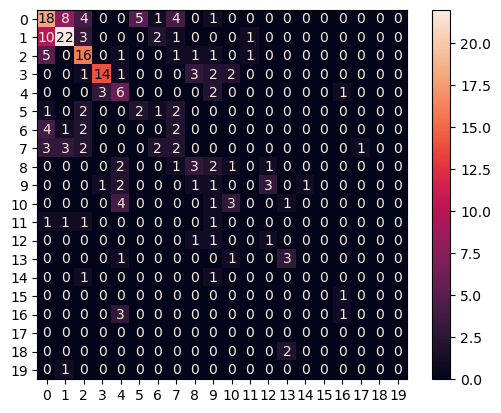

In [221]:
cm = confusion_matrix(split_Y_acc, current_y_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=current_rfc.classes_)
disp.plot(cmap='rocket', xticks_rotation=45)

Clearly, from our depth_and_accuracy chart, my accuracy is not actually all that good. The highest it got was 39.9% accuracy at a depth of 6. My model before with 90% accuracy was just overfitted. That being said, I'm still actually impressed by how well the model did, and we can see from the chart above what one of the problems actually was. Looking at the top left corner of the confusion matrix, we can see that our model correctly classified 23 WR. However, it imisidentified 9 of them as CBs and on the the reverse 8 of the real CBs were classified as WRs. The same story is true for OLBs, LBs, and DEs in some folds. This concept is due to what we discussed earlier in this section. A position is often classified as its opposing side's mirror matchup. WRs and CBs have to be of similar size and probably age, so the model is going to struggle to distinguish them. Thus, a 30-45% accuracy might not be all that bad.

Here is the legend once again to refer to the chart above (Unsure of how to turn the classes back into abbreviations in a confusion matrix):

WR (Wide Receiver): 0
CB (Cornerback): 1
RB (Running Back): 2
TE (Tight End): 3
OLB (Outside Linebacker): 4
QB (Quarterback): 5
FS (Free Safety): 6
SS (Strong Safety): 7
LB (Linebacker): 8
ILB (Inside Linebacker): 9
DE (Defensive End): 10
DB (Defensive Back): 11
MLB (Middle Linebacker): 12
DT (Defensive Tackle): 13
FB (Fullback): 14
P (Punter): 15
LS (Long Snapper): 16
S (Safety): 17
HB (Halfback): 18
NT (Nose Tackle): 19
K (Kicker): 20


At this point, there are two things I want to try. First of all, I will try another model (K-Nearest Neighbors) right below here, and then I will try one of my solutions I posed at the start of the section, and only try classifying a few positions to see if the accuracy is any better. I will try and only do positions on 1 side of the ball to eliminate the problem posed at the beginning of this cell.

In [ ]:
#KNN Model:
from sklearn.neighbors import KNeighborsClassifier

# kNeigh = KNeighborsClassifier()
# kNeigh.fit()
# kNeigh.

X = pred_df.drop("position", axis = 1)
y = pred_df['position']
y = y.astype(int) #Wanted?

X_train, X_holdout, Y_train, Y_holdout = train_test_split(X, y, test_size = 0.15)

n_neighbors_vals = np.arange(1, 20)

kf = KFold(n_splits = 5)
neighbor_accuracy = np.empty(0)

for k in n_neighbors_vals:
    current_knn = KNeighborsClassifier(n_neighbors = k)
    
    total_accuracy = np.empty(0)
    for train_idx, acc_idx in kf.split(X_train):

        split_X_train, split_X_acc = X_train.iloc[train_idx,:], X_train.iloc[acc_idx,:]
        split_Y_train, split_Y_acc = Y_train.iloc[train_idx], Y_train.iloc[acc_idx]

        current_knn.fit(split_X_train, split_Y_train)
        current_y_preds = current_knn.predict(split_X_acc)

        total_accuracy = np.append(total_accuracy, (np.sum(current_y_preds == split_Y_acc) / len(split_Y_acc)))

    neighbor_accuracy = np.append(neighbor_accuracy, np.mean(total_accuracy))

results = np.column_stack((n_neighbors_vals, neighbor_accuracy))

In [ ]:
results

Here, I did another K-fold cross validation like before, but just replaced the random forest model with a K-Nearest Neighbors model. Instead of depth as the selected hyperparameter, I chose the amount of neighbors used in deciding classes. However, it seems to have done overall worse than my random forest model. This is probably because K Neighbors Classifier judges based on distance, and with so many classes of players that are so alike in stature and age some groups certainly bleed over into others. For instance, a particularly large QB and a TE might be closer in size and age than that QB is with any other QB. Although their is less variation in the accuracies, this model did not reach the same high that random forest did. I'm not certain it matters much though, as neither had an accuracy of over 40% once. Because the random forest was a bit higher, and I liked being able to visualize mispredictions with the confusion matrix, I will again use a random forest classifier, but this time, with only 5 important positions to see if it has an easier time predicting them.

First, let's parse our dataframe to have those positions, then we can copy our train-test split from earlier on it.

In [ ]:
valid_positions = ['WR', 'RB', 'TE', 'QB', 'OLB']
reduced_pred_df = fixed_nfl[['height','weight', 'player_age', 'position']]

reduced_pred_df = reduced_pred_df[reduced_pred_df['position'].isin(valid_positions)]
reduced_pred_df.loc[:,"position"] = reduced_pred_df["position"].replace(["WR", "RB", "TE", 'QB', 'OLB'], [0, 1, 2, 3, 4])
reduced_pred_df

In [ ]:
X = reduced_pred_df.drop("position", axis = 1)
y = reduced_pred_df['position']
y = y.astype(int) #Wanted?

X_train_2, X_holdout_2, Y_train_2, Y_holdout_2 = train_test_split(X, y, test_size = 0.15)

max_depths_2 = np.arange(1, 15)

kf_2 = KFold(n_splits = 5)
depth_accuracy_2 = np.empty(0)

for i in max_depths_2:
    current_rfc_2 = RandomForestClassifier(max_depth = i)
    
    total_accuracy_2 = np.empty(0)
    for train_idx, acc_idx in kf_2.split(X_train_2):

        split_X_train_2, split_X_acc_2 = X_train_2.iloc[train_idx,:], X_train_2.iloc[acc_idx,:]
        split_Y_train_2, split_Y_acc_2 = Y_train_2.iloc[train_idx], Y_train_2.iloc[acc_idx]

        current_rfc_2.fit(split_X_train_2, split_Y_train_2)
        current_y_preds_2 = current_rfc_2.predict(split_X_acc_2)

        total_accuracy_2 = np.append(total_accuracy_2, (np.sum(current_y_preds_2 == split_Y_acc_2) / len(split_Y_acc_2)))

    depth_accuracy_2 = np.append(depth_accuracy_2, np.mean(total_accuracy_2))

In [ ]:
depth_and_accuracy_2 = pd.DataFrame({'depth': max_depths_2, "accuracy": depth_accuracy_2})
depth_and_accuracy_2.sort_values('depth', ascending=True)

In [ ]:
cm = confusion_matrix(split_Y_acc_2, current_y_preds_2)
disp = ConfusionMatrixDisplay(cm, display_labels=current_rfc_2.classes_)
disp.plot(cmap='mako', xticks_rotation=45)

Here's a little legend to reference:
WR = 0,
RB = 1,
TE = 2,
QB = 3,
OLB = 4

Just looking at the depth_and_accuracy_2 chart, this iteration of the random forest model did *much* better. Our best accuracies were almost double the best accuracies of the previous model with 20 classes. A 70% accuracy at depth 6 is pretty good, and the confusion matrix shows that our model didn't just classify everything as a WR to get high accuracy. Now, these positional classes were some of the top ones in terms of values, so it is hard to say whether this model did better because there were less classes, more average samples per class, or if the classes chosen were very distinguishable from each other. I would be curious to find some way to do this type of test in a loop, where each iteration is another 5 class combination. Then you could perhaps see what the most distinguishable positions are. From the confusion matrix it looks as though the model struggled a bit to distinguish Tight Ends and Outside Line Backers. This makes sense since Tight Ends are versatile enough to block on the outside as well, thus they have similar heights and weights. Also interesting is the fact that QBs were classified as everything across the board, and they are the only class that happened to. Perhaps QBs are the most varied in terms of age and stature.

### Conclusion:

Overall, I would say this random forest model is pretty useful, as long as you don't use too many classes. With this kind of model, if an incoming NFL player plays at multiple positions, the team he's drafted to might be able to better understand where he should be placed by comparing him to the current NFL players using it. It's also useful for seeing how varied positional statures are. However, I do not think this model is accurate enough that anyone would use it. The model struggles too much in distinguishing mirrored positions such as CB and WR with the few features it predicts with. This type of model used to predict basketball positions may do MUCH better, since the offense and defense aren't different players that have essentially the same body types. 

Still, I think if a few more features were included in the data we could do much better at predicting. Right now, we only use height, weight, and age. Perhaps having a column in my original dataframe of minutes played or snapcount would increase the accuracy, those might vary based on offense and defense and give the model something to drive those groups apart. We could go even further and have a "receptions" variable. Since only really offensive players have any receptions, that would definitely drive apart positions WR and CB. I'm not certain that wouldn't just defeat the purpose of the model though, since if you're trying to predict a player's position seeing that a player has greather than 0 receptions eliminates half the positional roster from the get-go. It's interesting to think about though, and acknowlegding more features could be included with more data is the first step in improving this model. 